## Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## Loading the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

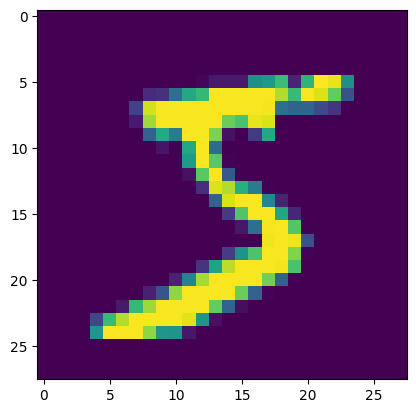

In [7]:
single_image = X_train[0]

plt.imshow(single_image)

## Performing One Hot Encoding on y_train and y_test

In [8]:
y_train_to_categorical = to_categorical(y_train)

In [9]:
y_test_to_categorical = to_categorical(y_test)

## Performing Normalization on X_train and X_test

In [10]:
X_train = X_train / 255 
X_test = X_test / 255

## Reshaping X_train and X_test

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [12]:
X_test = X_test.reshape(10000, 28, 28, 1)

## Creating and training the model

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten()) 

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax')) 

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [17]:
model.fit(x=X_train, y=y_train_to_categorical, epochs=10, validation_data=(X_test, y_test_to_categorical), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1388 - accuracy: 0.9578 - val_loss: 0.0567 - val_accuracy: 0.9818
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0471 - accuracy: 0.9850 - val_loss: 0.0508 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0445 - val_accuracy: 0.9854
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.0455 - val_accuracy: 0.9865


## Visualizing the loss and the accuracy of the model

In [18]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

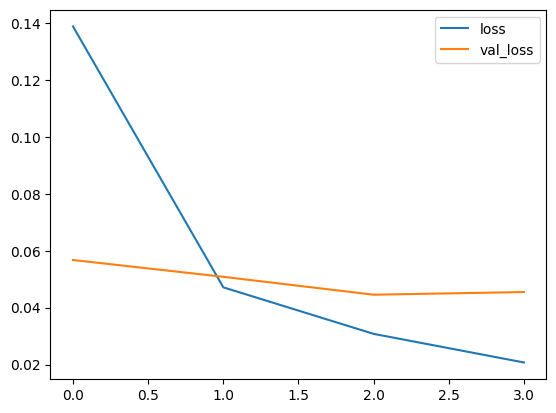

In [19]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

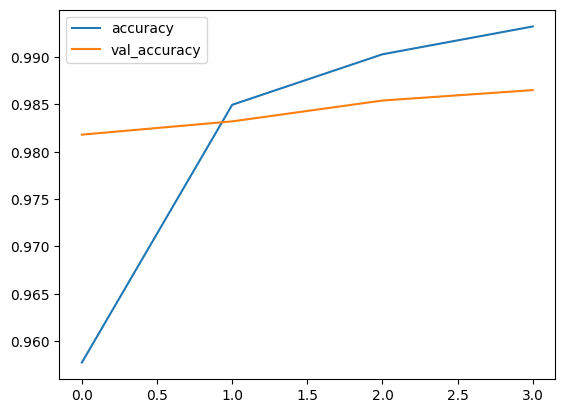

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

## Creating the classification report and the confusion matrix of the model

In [21]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [22]:
prediction_classes = np.argmax(predictions, axis=1)

In [23]:
prediction_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [24]:
print(classification_report(y_test, prediction_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.96      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
confusion_matrix(y_test, prediction_classes)

array([[ 975,    0,    2,    1,    0,    0,    2,    0,    0,    0],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1013,    8,    1,    0,    0,    4,    3,    0],
       [   0,    0,    0, 1008,    0,    0,    0,    0,    2,    0],
       [   0,    0,    0,    0,  975,    0,    1,    0,    1,    5],
       [   2,    0,    0,   11,    0,  876,    1,    0,    2,    0],
       [   8,    3,    0,    1,    2,    5,  937,    0,    2,    0],
       [   0,    2,    7,    2,    1,    0,    0, 1014,    1,    1],
       [   5,    0,    1,    1,    0,    1,    0,    0,  965,    1],
       [   0,    3,    0,   12,   12,    3,    0,    4,    5,  970]],
      dtype=int64)

<Axes: >

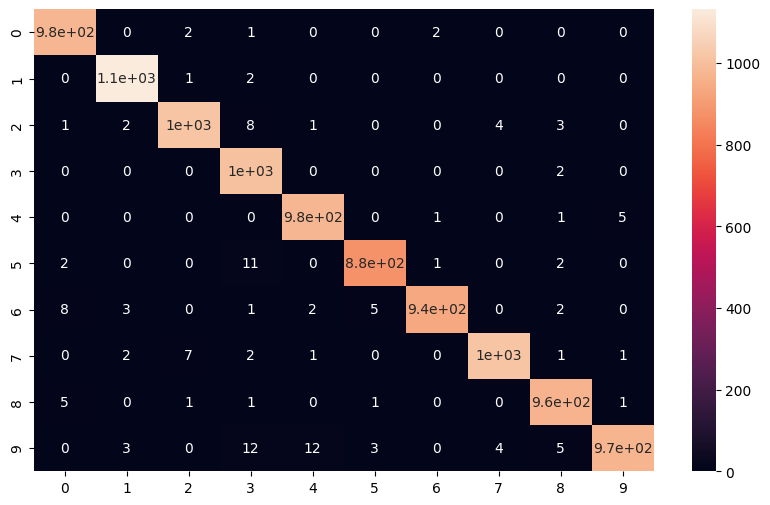

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, prediction_classes), annot=True)

## Performing prediction on sample input image

In [27]:
sample_img = X_test[0]

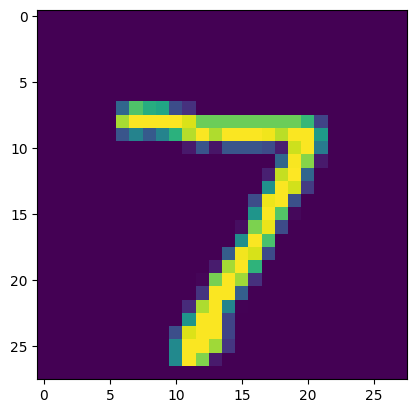

In [28]:
plt.imshow(sample_img)

In [29]:
pred_sample = model.predict(sample_img.reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 24ms/step


In [30]:
np.argmax(pred_sample, axis=1)[0]

7